# Data Processing

## Load MNIST on Python 3.x

In [20]:
import pickle
import gzip

In [21]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

## Load USPS on Python 3.x

In [22]:
from PIL import Image
import os
import numpy as np

In [23]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

# Classification

## Import headers and Initialization

In [24]:
import itertools
import numpy as np
import pandas as pd
import scipy.sparse
import keras
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
import seaborn

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

class_names = np.array([0, 1,2, 3,4,5,6,7,8,9])

## Graph Builder

In [25]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [26]:
def generate_confusion_matrix(target,predicted):
    con_mat = np.zeros((10,10), dtype=int)
    for i in range(len(target)):
        con_mat[target[i]][predicted[i]] = con_mat[target[i]][predicted[i]] + 1
    return con_mat

In [27]:
def plot_confgraph(confusion,class_names=class_names):
    plt.figure()
    plot_confusion_matrix(confusion, classes=class_names,title='Confusion matrix')
    plt.show()

In [28]:
def plot_history(history):
    %matplotlib inline
    dataframeobj = pd.DataFrame(history.history)
    dataframevar=dataframeobj.plot(subplots=True, figsize=(15,20))
    figure=dataframevar[0].get_figure()

In [29]:
def plot_histogram(value, title):
    plt.figure(figsize=(5,2))
    plt.title('Histogram prediction for ' + str(title))
    plt.hist(value)

## Logistic Regression

In [30]:
#Softmax returns the probabilites of the classes
def softmax(z):
    return np.exp(z-z.max())/sum(np.exp(z-z.max()))

In [31]:
#One hot encoding
def create_binary_array(z):
    target = z.shape[0]
    target = scipy.sparse.csr_matrix((np.ones(target), (z, np.array(range(target)))))
    target = np.array(target.todense()).T
    return target

In [32]:
#Determine the loss function. Perform softmax and get their probabilities
def getLoss(weight,x_train,y_train,regularization):
    target = create_binary_array(y_train) 
    scores = np.dot(x_train,weight) 
    prob = softmax(scores) 
    loss = (-1/x_train.shape[0]) * np.sum(target * np.log(prob)) + (regularization/2)*np.sum(weight*weight)
    gradient = (-1/x_train.shape[0]) * np.dot(x_train.T,(target - prob)) + regularization*weight 
    return loss,gradient

In [33]:
#This method determines the model accuracy 
def getAccuracy(train,test):
    val = softmax(np.dot(train,weight))
    predicted = np.argmax(val,axis=1)
    accuracy = sum(predicted == test)/(float(len(test)))
    return val,predicted,accuracy

In [34]:
#Find the weights for the model
weight = np.zeros([training_data[0].shape[1],len(np.unique(training_data[1]))])
regularization = 2
iterations = 300
for i in range(1,iterations):
    learningRate = 1/i
    loss,gradient = getLoss(weight,training_data[0],training_data[1],regularization)
    weight = weight - (learningRate * gradient)  

In [35]:
mnist_logistic_prediction_val,mnist_logistic_target_val, mnist_logistic_accuracy_val  = getAccuracy(validation_data[0],validation_data[1])
mnist_logistic_prediction,mnist_logistic_target, mnist_logistic_accuracy  = getAccuracy(test_data[0],test_data[1])
usps_logistic_prediction,usps_logistic_target, usps_logistic_accuracy = getAccuracy(USPSMat,USPSTar)

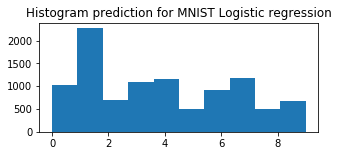

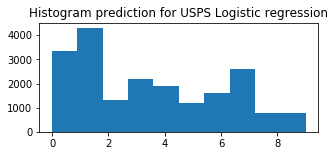

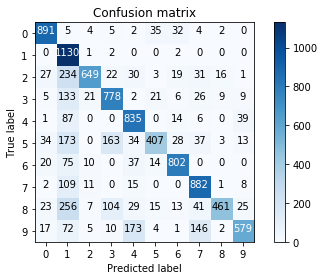

             precision    recall  f1-score   support

          0       0.87      0.91      0.89       980
          1       0.50      1.00      0.66      1135
          2       0.92      0.63      0.75      1032
          3       0.72      0.77      0.74      1010
          4       0.72      0.85      0.78       982
          5       0.82      0.46      0.59       892
          6       0.87      0.84      0.86       958
          7       0.75      0.86      0.80      1028
          8       0.93      0.47      0.63       974
          9       0.86      0.57      0.69      1009

avg / total       0.79      0.74      0.74     10000



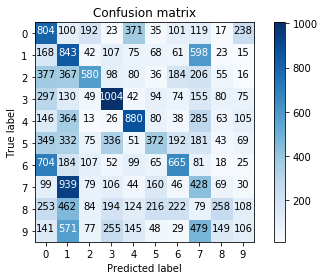

             precision    recall  f1-score   support

          0       0.24      0.40      0.30      2000
          1       0.20      0.42      0.27      2000
          2       0.45      0.29      0.35      1999
          3       0.46      0.50      0.48      2000
          4       0.46      0.44      0.45      2000
          5       0.32      0.19      0.23      2000
          6       0.41      0.33      0.37      2000
          7       0.16      0.21      0.19      2000
          8       0.33      0.13      0.19      2000
          9       0.13      0.05      0.08      2000

avg / total       0.32      0.30      0.29     19999



In [36]:

plot_histogram(mnist_logistic_target, "MNIST Logistic regression")
plot_histogram(usps_logistic_target, "USPS Logistic regression")

mnist_logistic_confusion_result = generate_confusion_matrix(test_data[1], mnist_logistic_target)
usps_logistic_confusion_result = generate_confusion_matrix(USPSTar, usps_logistic_target)

mnist_logistic_confusion_result_def = confusion_matrix(test_data[1], mnist_logistic_target)
usps_logistic_confusion_result_def = confusion_matrix(USPSTar, usps_logistic_target)


plot_confgraph(mnist_logistic_confusion_result,class_names)
print(metrics.classification_report(test_data[1], mnist_logistic_target))

plot_confgraph(usps_logistic_confusion_result,class_names)
print(metrics.classification_report(USPSTar, usps_logistic_target))

## Deep Learning Neural Network

In [37]:
def DNN(x_train,y_train,x_test,y_test,x_test_usps,y_test_usps,x_val,y_val):
    x_test_usps=np.array(x_test_usps)
    x_test_usps=x_test_usps.reshape(x_test_usps.shape[0], 28*28)
    num_classes=10
    image_vector_size=28*28
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_val = keras.utils.to_categorical(y_val, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    y_test_usps = keras.utils.to_categorical(y_test_usps, num_classes)
    
    #model definition
    model = Sequential()
    model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    
    #training
    history = model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=True)
    
    #validation - parameter tweaking
    val_prediction_raw_nn = model.predict(x_val)
    prediction_nn_val = model.predict_classes(x_val)  

    #Prediction for test
    prediction_raw_nn = model.predict(x_test)
    prediction_raw_nn_usps = model.predict(x_test_usps)
    prediction_nn = model.predict_classes(x_test)  
    prediction_nn_usps = model.predict_classes(x_test_usps)
    
    loss_val,accuracy_val = model.evaluate(x_val, y_val, verbose=False)
    loss,accuracy = model.evaluate(x_test, y_test, verbose=False)
    loss_usps,accuracy_usps = model.evaluate(x_test_usps, y_test_usps, verbose=False) 
    return history,prediction_raw_nn,prediction_nn,prediction_raw_nn_usps,prediction_nn_usps,loss,accuracy,loss_usps,accuracy_usps


In [38]:
nn_history,mnist_nn_prediction,mnist_nn_target,usps_nn_prediction,usps_nn_target,mnist_nn_loss,mnist_nn_accuracy,usps_nn_loss,usps_nn_accuracy =  DNN(training_data[0],training_data[1],test_data[0],test_data[1],USPSMat,USPSTar,validation_data[0],validation_data[1])


Epoch 1/200
50000/50000 [==============================] - 1s 26us/step - loss: 2.0204 - acc: 0.4788
Epoch 2/200
50000/50000 [==============================] - 1s 24us/step - loss: 1.5101 - acc: 0.6863
Epoch 3/200
50000/50000 [==============================] - 1s 24us/step - loss: 1.1631 - acc: 0.7565
Epoch 4/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.9443 - acc: 0.8024
Epoch 5/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.8040 - acc: 0.8293
Epoch 6/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.7078 - acc: 0.8453
Epoch 7/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.6380 - acc: 0.8573
Epoch 8/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.5848 - acc: 0.8663
Epoch 9/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.5434 - acc: 0.8732
Epoch 10/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.5102 - a

50000/50000 [==============================] - 1s 24us/step - loss: 0.1672 - acc: 0.9522
Epoch 159/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.1667 - acc: 0.9525
Epoch 160/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.1662 - acc: 0.9524
Epoch 161/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.1657 - acc: 0.9528
Epoch 162/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.1651 - acc: 0.9529
Epoch 163/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.1647 - acc: 0.9529
Epoch 164/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.1642 - acc: 0.9531
Epoch 165/200
50000/50000 [==============================] - 1s 25us/step - loss: 0.1637 - acc: 0.9536
Epoch 166/200
50000/50000 [==============================] - 1s 26us/step - loss: 0.1632 - acc: 0.9535
Epoch 167/200
50000/50000 [==============================] - 1s 24us/step - loss: 0.162

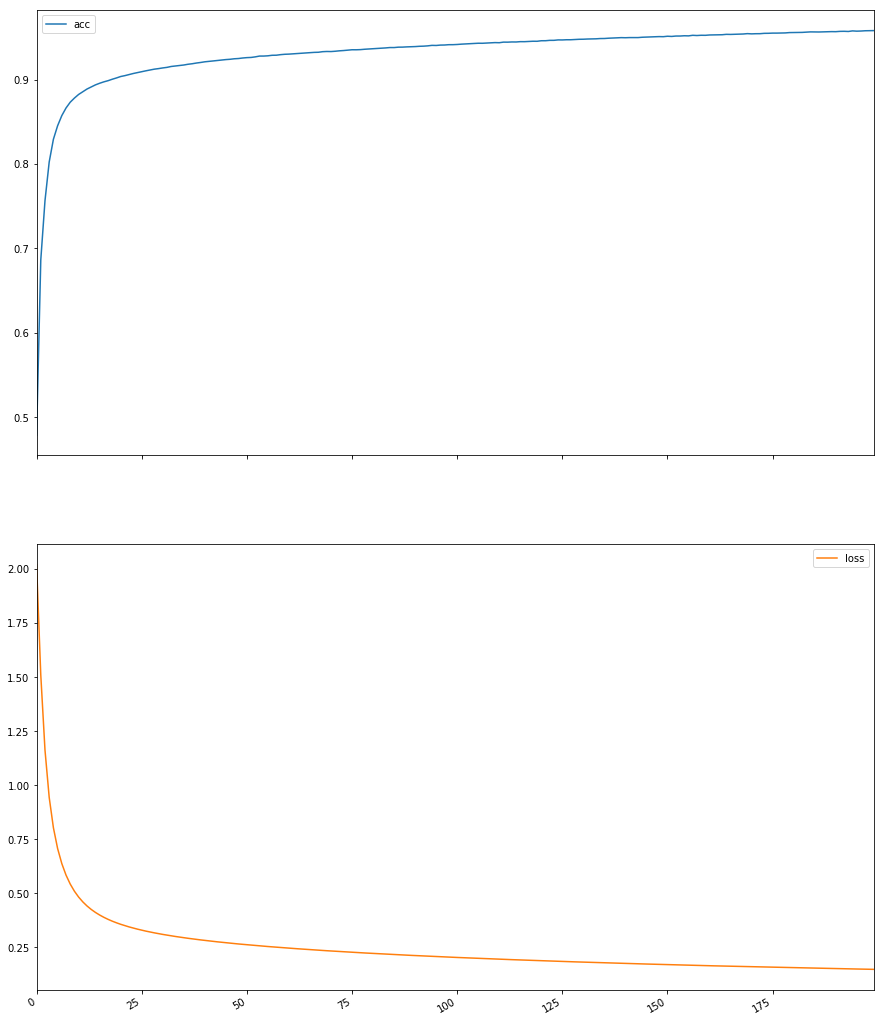

In [39]:
plot_history(nn_history)

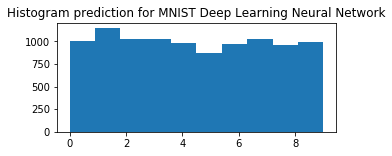

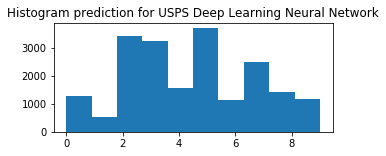

In [40]:
plot_histogram(mnist_nn_target, "MNIST Deep Learning Neural Network")
plot_histogram(usps_nn_target, "USPS Deep Learning Neural Network")

mnist_nn_confusion_matrix = generate_confusion_matrix(test_data[1], mnist_nn_target)
usps_nn_confusion_matrix = generate_confusion_matrix(USPSTar, usps_nn_target)

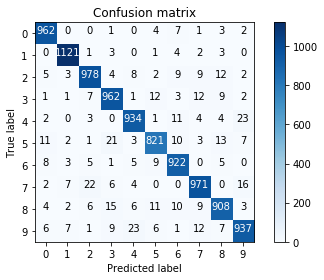

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.98      0.99      0.98      1135
          2       0.96      0.95      0.95      1032
          3       0.94      0.95      0.95      1010
          4       0.95      0.95      0.95       982
          5       0.95      0.92      0.93       892
          6       0.94      0.96      0.95       958
          7       0.95      0.94      0.95      1028
          8       0.94      0.93      0.94       974
          9       0.94      0.93      0.94      1009

avg / total       0.95      0.95      0.95     10000



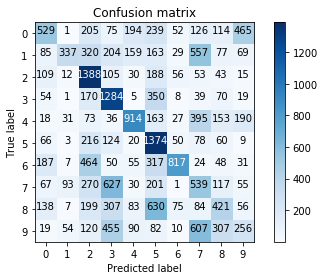

             precision    recall  f1-score   support

          0       0.42      0.26      0.32      2000
          1       0.62      0.17      0.26      2000
          2       0.41      0.69      0.51      1999
          3       0.39      0.64      0.49      2000
          4       0.58      0.46      0.51      2000
          5       0.37      0.69      0.48      2000
          6       0.73      0.41      0.52      2000
          7       0.22      0.27      0.24      2000
          8       0.30      0.21      0.25      2000
          9       0.22      0.13      0.16      2000

avg / total       0.42      0.39      0.38     19999



In [41]:
plot_confgraph(mnist_nn_confusion_matrix,class_names)
print(metrics.classification_report(test_data[1], mnist_nn_target))

plot_confgraph(usps_nn_confusion_matrix,class_names)
print(metrics.classification_report(USPSTar, usps_nn_target))

# CNN

In [42]:
def CNN(x_train,y_train,x_test,y_test,x_test_usps,y_test_usps,x_val,y_val):
    x_test_usps=np.array(x_test_usps)

    #the 4th parametere '1', in reshape denotes that grayscale image 
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    x_test_usps = x_test_usps.reshape(x_test_usps.shape[0], 28, 28, 1) 
    
    #Shape and classes to be predicted
    input_shape = (28, 28, 1)
    num_classes = 10

    # convert target to binary class targets
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_val = keras.utils.to_categorical(y_val, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    y_test_usps = keras.utils.to_categorical(y_test_usps, num_classes)

    #build model
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    #training 
    history = model.fit(x_train, y_train,batch_size=64,epochs=5,verbose=1)
    
    #validation - tweaking paramters
    prediction_raw_cnn_val = model.predict(x_val)
    prediction_cnn_val = model.predict_classes(x_val)
    
    #testing
    prediction_raw_cnn = model.predict(x_test)
    prediction_raw_cnn_usps = model.predict(x_test_usps)
    
    prediction_cnn = model.predict_classes(x_test)
    prediction_cnn_usps = model.predict_classes(x_test_usps)
    
    #find loss and accuracy of the model
    loss_val,accuracy_val = model.evaluate(x_val, y_val, verbose=False)
    loss,accuracy = model.evaluate(x_test, y_test, verbose=False) 
    loss_usps,accuracy_usps = model.evaluate(x_test_usps, y_test_usps, verbose=False) 

    return history,prediction_raw_cnn,prediction_cnn,prediction_raw_cnn_usps,prediction_cnn_usps,loss,accuracy,loss_usps,accuracy_usps


In [43]:
cnn_history,mnist_cnn_prediction,mnist_cnn_target,usps_cnn_prediction,usps_cnn_target,mnist_cnn_loss,mnist_cnn_accuracy,usps_cnn_loss,usps_cnn_accuracy =  CNN(training_data[0],training_data[1],test_data[0],test_data[1],USPSMat,USPSTar,validation_data[0],validation_data[1])


Epoch 1/5
50000/50000 [==============================] - 289s 6ms/step - loss: 0.5416 - acc: 0.8503
Epoch 2/5
50000/50000 [==============================] - 289s 6ms/step - loss: 0.3306 - acc: 0.9039
Epoch 3/5
50000/50000 [==============================] - 290s 6ms/step - loss: 0.2911 - acc: 0.9165
Epoch 4/5
50000/50000 [==============================] - 286s 6ms/step - loss: 0.2481 - acc: 0.9290
Epoch 5/5
50000/50000 [==============================] - 287s 6ms/step - loss: 0.1934 - acc: 0.9449


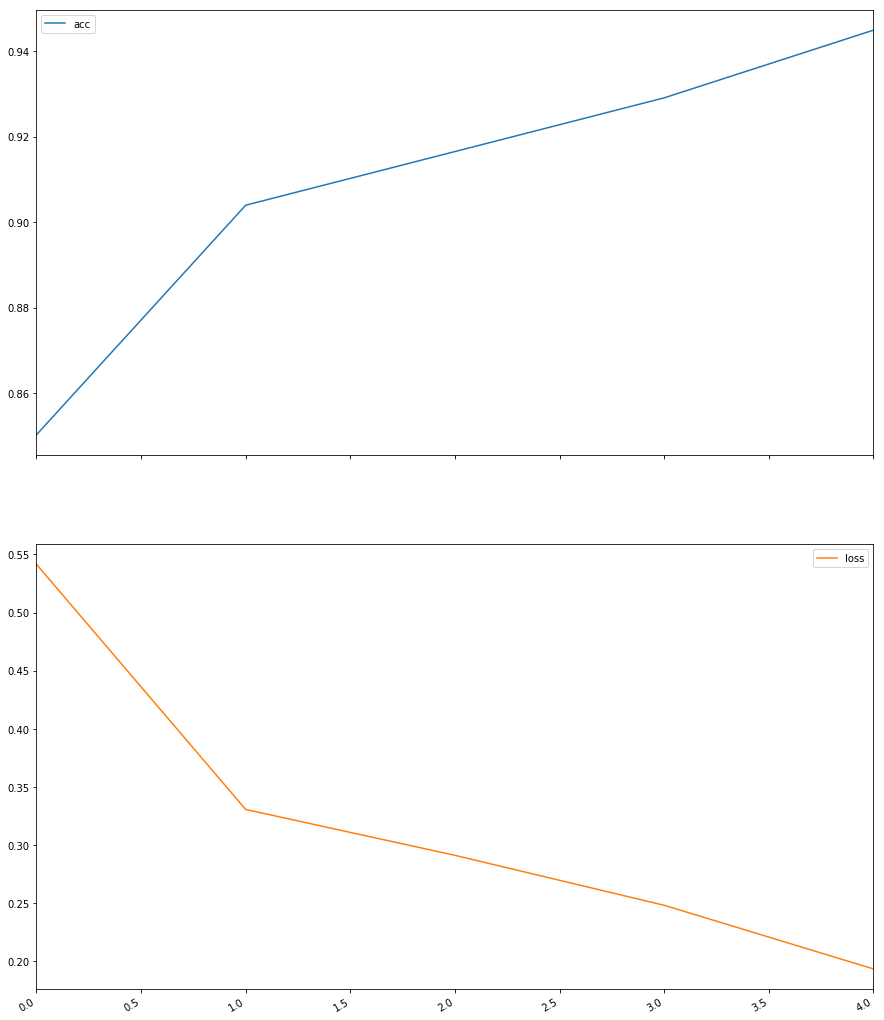

In [44]:
plot_history(cnn_history)

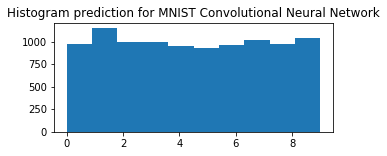

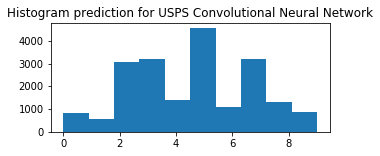

In [45]:

plot_histogram(mnist_cnn_target, "MNIST Convolutional Neural Network")
plot_histogram(usps_cnn_target, "USPS Convolutional Neural Network")

mnist_cnn_confusion_matrix = generate_confusion_matrix(test_data[1], mnist_cnn_target)
usps_cnn_confusion_matrix = generate_confusion_matrix(USPSTar, usps_cnn_target)


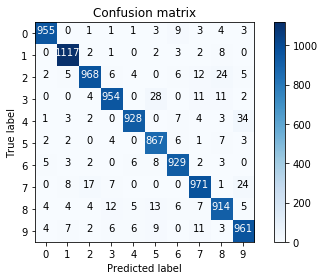

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       980
          1       0.97      0.98      0.98      1135
          2       0.97      0.94      0.95      1032
          3       0.96      0.94      0.95      1010
          4       0.98      0.95      0.96       982
          5       0.93      0.97      0.95       892
          6       0.96      0.97      0.97       958
          7       0.95      0.94      0.95      1028
          8       0.93      0.94      0.94       974
          9       0.93      0.95      0.94      1009

avg / total       0.96      0.96      0.96     10000



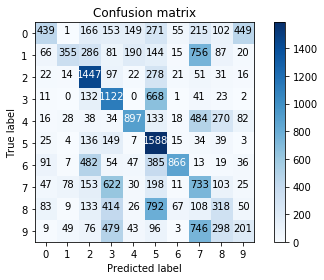

             precision    recall  f1-score   support

          0       0.54      0.22      0.31      2000
          1       0.65      0.18      0.28      2000
          2       0.47      0.72      0.57      1999
          3       0.35      0.56      0.43      2000
          4       0.64      0.45      0.53      2000
          5       0.35      0.79      0.48      2000
          6       0.81      0.43      0.56      2000
          7       0.23      0.37      0.28      2000
          8       0.25      0.16      0.19      2000
          9       0.23      0.10      0.14      2000

avg / total       0.45      0.40      0.38     19999



In [46]:
plot_confgraph(mnist_cnn_confusion_matrix,class_names)
print(metrics.classification_report(test_data[1], mnist_cnn_target))

plot_confgraph(usps_cnn_confusion_matrix,class_names)
print(metrics.classification_report(USPSTar, usps_cnn_target))

## SVM Classifier

In [47]:
def SVM_classifier(kernel,C,gamma,train_feature,train_target,test_feature,test_target,test_feature_usps,test_target_usps,val_feature,val_target):
    print("SVM Classifier invoked")
    #build the model
    classifier = SVC(kernel=kernel, C=C, gamma = gamma,probability=True)
    
    #training
    history = classifier.fit(train_feature,train_target)
    
    #validatiion by tweaking parameters
    prediction_raw_SVM_val = classifier.predict_proba(val_feature)
    prediction_SVM_val = classifier.predict(val_feature)
    accuracy_val = classifier.score(val_feature,val_target)

    #testing
    prediction_raw_SVM = classifier.predict_proba(test_feature)
    prediction_SVM = classifier.predict(test_feature)
    print("SVM Classifier fit for MNIST has completed")
    accuracy = classifier.score(test_feature,test_target)
    print("SVM Classifier score for MNIST has completed")

    
    prediction_raw_SVM_usps = classifier.predict_proba(test_feature_usps)
    prediction_SVM_usps = classifier.predict(test_feature_usps)
    print("SVM Classifier fit for USPS has completed")
    accuracy_usps = classifier.score(test_feature_usps,test_target_usps)
    print("SVM Classifier score for USPS has completed")
    return history,prediction_raw_SVM,prediction_SVM,prediction_raw_SVM_usps,prediction_SVM_usps,accuracy,accuracy_usps
    


In [48]:
svm_history,mnist_svm_prediction,mnist_svm_target,usps_svm_prediction,usps_svm_target,mnist_svm_accuracy,usps_svm_accuracy = SVM_classifier('rbf',2,0.03,training_data[0],training_data[1],test_data[0],test_data[1],USPSMat,USPSTar,validation_data[0],validation_data[1])


SVM Classifier invoked
SVM Classifier fit for MNIST has completed
SVM Classifier score for MNIST has completed
SVM Classifier fit for USPS has completed
SVM Classifier score for USPS has completed


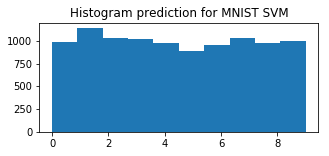

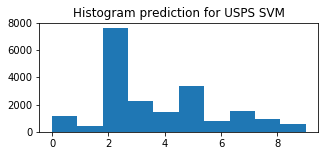

In [49]:

plot_histogram(mnist_svm_target, "MNIST SVM")
plot_histogram(usps_svm_target, "USPS SVM")

mnist_svm_confusion_matrix = generate_confusion_matrix(test_data[1], mnist_svm_target)
usps_svm_confusion_matrix = generate_confusion_matrix(USPSTar, usps_svm_target)

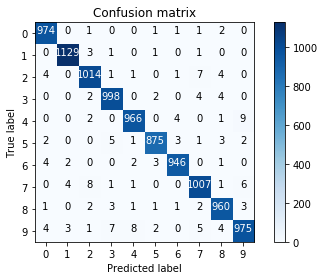

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.98      0.98       982
          5       0.99      0.98      0.98       892
          6       0.99      0.99      0.99       958
          7       0.98      0.98      0.98      1028
          8       0.98      0.99      0.98       974
          9       0.98      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



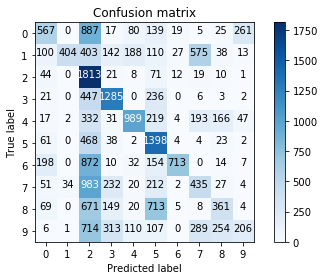

             precision    recall  f1-score   support

          0       0.50      0.28      0.36      2000
          1       0.92      0.20      0.33      2000
          2       0.24      0.91      0.38      1999
          3       0.57      0.64      0.61      2000
          4       0.68      0.49      0.57      2000
          5       0.42      0.70      0.52      2000
          6       0.91      0.36      0.51      2000
          7       0.28      0.22      0.25      2000
          8       0.39      0.18      0.25      2000
          9       0.38      0.10      0.16      2000

avg / total       0.53      0.41      0.39     19999



In [50]:
plot_confgraph(mnist_svm_confusion_matrix,class_names)
print(metrics.classification_report(test_data[1], mnist_svm_target))

plot_confgraph(usps_svm_confusion_matrix,class_names)
print(metrics.classification_report(USPSTar, usps_svm_target))

## Random Forest Classifier

In [51]:
def randomforest_classifier(estimators,train_feature,train_target,test_feature,test_target,test_feature_usps,test_target_usps,val_feature,val_target):
    classifier = RandomForestClassifier(n_estimators = estimators,criterion='entropy')
    history = classifier.fit(train_feature,train_target)
    
    prediction_randomforest_raw_val = classifier.predict_proba(val_feature)
    prediction_randomforest_val = classifier.predict(val_feature)
    accuracy_val = classifier.score(val_feature,val_target)
    
    prediction_randomforest_raw = classifier.predict_proba(test_feature)
    prediction_randomforest = classifier.predict(test_feature)
    accuracy = classifier.score(test_feature,test_target)
    
    prediction_raw_SVM_usps = classifier.predict_proba(test_feature_usps)
    prediction_SVM_usps = classifier.predict(test_feature_usps)
    accuracy_usps = classifier.score(test_feature_usps,test_target_usps)
    
    return history,prediction_randomforest_raw,prediction_randomforest,prediction_raw_SVM_usps,prediction_SVM_usps,accuracy,accuracy_usps
    
    

In [52]:
randomforest_history,mnist_randomforest_prediction,mnist_randomforest_target,usps_randomforest_prediction,usps_randomforest_target,mnist_randomforest_accuracy,usps_randomforest_accuracy = randomforest_classifier(100,training_data[0],training_data[1],test_data[0],test_data[1],USPSMat,USPSTar,validation_data[0],validation_data[1])
#plot_history(randomforest_history)

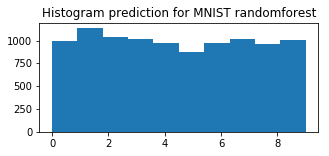

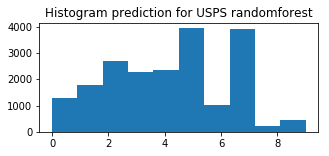

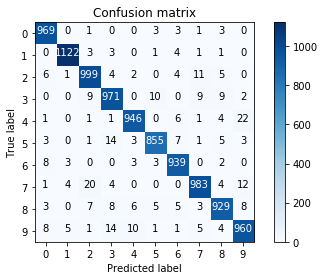

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.97      0.96      1032
          3       0.95      0.96      0.96      1010
          4       0.98      0.96      0.97       982
          5       0.97      0.96      0.97       892
          6       0.97      0.98      0.97       958
          7       0.97      0.96      0.96      1028
          8       0.96      0.95      0.96       974
          9       0.95      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000



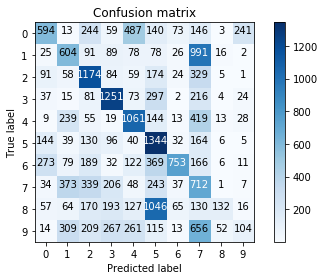

             precision    recall  f1-score   support

          0       0.46      0.30      0.36      2000
          1       0.34      0.30      0.32      2000
          2       0.44      0.59      0.50      1999
          3       0.54      0.63      0.58      2000
          4       0.45      0.53      0.49      2000
          5       0.34      0.67      0.45      2000
          6       0.73      0.38      0.50      2000
          7       0.18      0.36      0.24      2000
          8       0.55      0.07      0.12      2000
          9       0.24      0.05      0.09      2000

avg / total       0.43      0.39      0.36     19999



In [53]:

plot_histogram(mnist_randomforest_target, "MNIST randomforest")
plot_histogram(usps_randomforest_target, "USPS randomforest")

mnist_randomforest_confusion_matrix = generate_confusion_matrix(test_data[1], mnist_randomforest_target)
usps_randomforest_confusion_matrix = generate_confusion_matrix(USPSTar, usps_randomforest_target)
                                                               
plot_confgraph(mnist_randomforest_confusion_matrix,class_names)
print(metrics.classification_report(test_data[1], mnist_randomforest_target))

plot_confgraph(usps_randomforest_confusion_matrix,class_names)
print(metrics.classification_report(USPSTar, usps_randomforest_target))

## Ensemble Method

In [54]:
def most_frequent(text):
    frequencies = [(c, text.count(c)) for c in set(text)]
    return max(frequencies, key=lambda x: x[1])[0]


def voting_hard(target,target1,target2,target3,target4,target5,target6,target7,target8,target9):
    result = []
    print('Method called')
    for i in range(len(target)):
        temp_array = []
        temp_array.append(target[i])
        temp_array.append(target1[i])
        temp_array.append(target2[i])
        temp_array.append(target3[i])
        temp_array.append(target4[i])
        ans = (most_frequent(temp_array))
        result.append(ans)
    result1 = []
    print('Method called')
    for i in range(len(target5)):
        temp_array = []
        temp_array.append(target5[i])
        temp_array.append(target6[i])
        temp_array.append(target7[i])
        temp_array.append(target8[i])
        temp_array.append(target9[i])
        ans = (most_frequent(temp_array))
        result1.append(ans)
    return result,result1

Method called
Method called


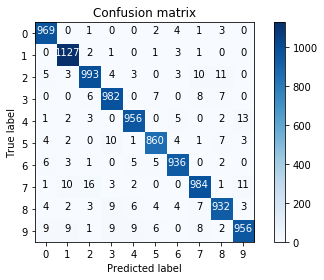

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.97      0.99      0.98      1135
          2       0.97      0.96      0.97      1032
          3       0.96      0.97      0.97      1010
          4       0.97      0.97      0.97       982
          5       0.97      0.96      0.97       892
          6       0.98      0.98      0.98       958
          7       0.96      0.96      0.96      1028
          8       0.96      0.96      0.96       974
          9       0.97      0.95      0.96      1009

avg / total       0.97      0.97      0.97     10000



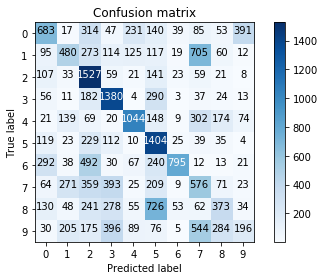

             precision    recall  f1-score   support

          0       0.43      0.34      0.38      2000
          1       0.38      0.24      0.29      2000
          2       0.40      0.76      0.52      1999
          3       0.49      0.69      0.57      2000
          4       0.62      0.52      0.57      2000
          5       0.40      0.70      0.51      2000
          6       0.81      0.40      0.53      2000
          7       0.24      0.29      0.26      2000
          8       0.34      0.19      0.24      2000
          9       0.25      0.10      0.14      2000

avg / total       0.44      0.42      0.40     19999



In [55]:
voting_hard,voting_hard_usps = voting_hard(mnist_logistic_target,mnist_nn_target,mnist_cnn_target,mnist_svm_target,mnist_randomforest_target,usps_logistic_target,usps_nn_target,usps_cnn_target,usps_svm_target,usps_randomforest_target)
confusion_result_voting_hard = confusion_matrix(test_data[1], voting_hard)
plot_confgraph(confusion_result_voting_hard,class_names)
print(metrics.classification_report(test_data[1], voting_hard))



confusion_result_voting_hard_usps = confusion_matrix(USPSTar, voting_hard_usps)
plot_confgraph(confusion_result_voting_hard_usps,class_names)
print(metrics.classification_report(USPSTar, voting_hard_usps))


In [56]:
def voting_soft(target,target1,target2,target3,target4,target5,target6,target7,target8,target9):
    result = []
    solution = []
    for i in range(len(target)):
        temp_array = []
        for j in range(len(target[i])):
            ans = (target[i][j] + target1[i][j] + target2[i][j] + target3[i][j] + target4[i][j])
            temp_array.append(ans/5)
        result.append(temp_array)
    for i in range(len(result)):
        solution.append(result[i].index(max(result[i])))

    result1 = []
    solution1 = []
    for i in range(len(target5)):
        temp_array = []
        for j in range(len(target5[i])):
            ans = (target5[i][j] + target6[i][j] + target7[i][j] + target8[i][j] + target9[i][j])
            temp_array.append(ans/5)
        result1.append(temp_array)
    for i in range(len(result1)):
        solution1.append(result1[i].index(max(result1[i])))        
        
    return solution,solution1


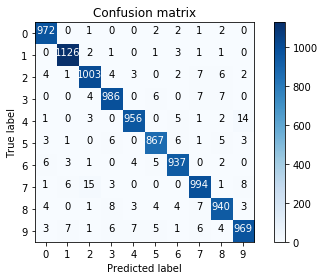

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.98      0.99      0.99      1135
          2       0.97      0.97      0.97      1032
          3       0.97      0.98      0.97      1010
          4       0.98      0.97      0.98       982
          5       0.97      0.97      0.97       892
          6       0.98      0.98      0.98       958
          7       0.97      0.97      0.97      1028
          8       0.97      0.97      0.97       974
          9       0.97      0.96      0.97      1009

avg / total       0.97      0.97      0.97     10000



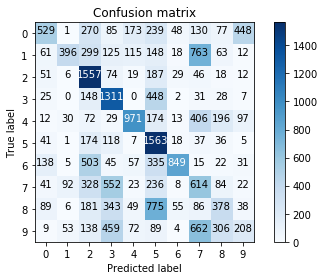

             precision    recall  f1-score   support

          0       0.53      0.26      0.35      2000
          1       0.67      0.20      0.31      2000
          2       0.42      0.78      0.55      1999
          3       0.42      0.66      0.51      2000
          4       0.65      0.49      0.56      2000
          5       0.37      0.78      0.50      2000
          6       0.81      0.42      0.56      2000
          7       0.22      0.31      0.26      2000
          8       0.31      0.19      0.24      2000
          9       0.24      0.10      0.14      2000

avg / total       0.47      0.42      0.40     19999



In [57]:
voting_soft,voting_soft_usps = voting_soft(mnist_logistic_prediction,mnist_nn_prediction,mnist_cnn_prediction,mnist_svm_prediction,mnist_randomforest_prediction,usps_logistic_prediction,usps_nn_prediction,usps_cnn_prediction,usps_svm_prediction,usps_randomforest_prediction)
confusion_result_voting_soft = confusion_matrix(test_data[1], voting_soft)
plot_confgraph(confusion_result_voting_soft,class_names)
print(metrics.classification_report(test_data[1], voting_soft))

confusion_result_voting_soft_usps = confusion_matrix(USPSTar, voting_soft_usps)
plot_confgraph(confusion_result_voting_soft_usps,class_names)
print(metrics.classification_report(USPSTar, voting_soft_usps))

